# Interactive cropping with napari
When cropping three-dimensional data it might make sense to do this interactively, e.g. using napari. For scripting convenience, we use a napari plugin, called [napari-crop](https://github.com/biapol/napari-crop).

See also
* [napari shapes layer tutorial](https://napari.org/tutorials/fundamentals/shapes.html)
* [magicgui](https://napari.org/magicgui/)

In [1]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imread
from magicgui import magicgui

# The following is a private function. The interface 
# maz be changed later. If you copy that code and it 
# breaks later, please come back to this notebook 
# and check how to update your code.
from napari_crop._function import crop_region

We start by loading a dataset and showing it in napari.

C:\Users\rober\Anaconda3\envs\bio_39\lib\site-packages\napari\plugins\_plugin_manager.py:494: UserWarning: Plugin 'napari-accelerated-pixel-and-object-classification' provided a non-callable type to `napari_experimental_provide_function`: <class 'magicgui._magicgui.MagicFactory'>. Function widget ignored.
  warn(message=warn_message)


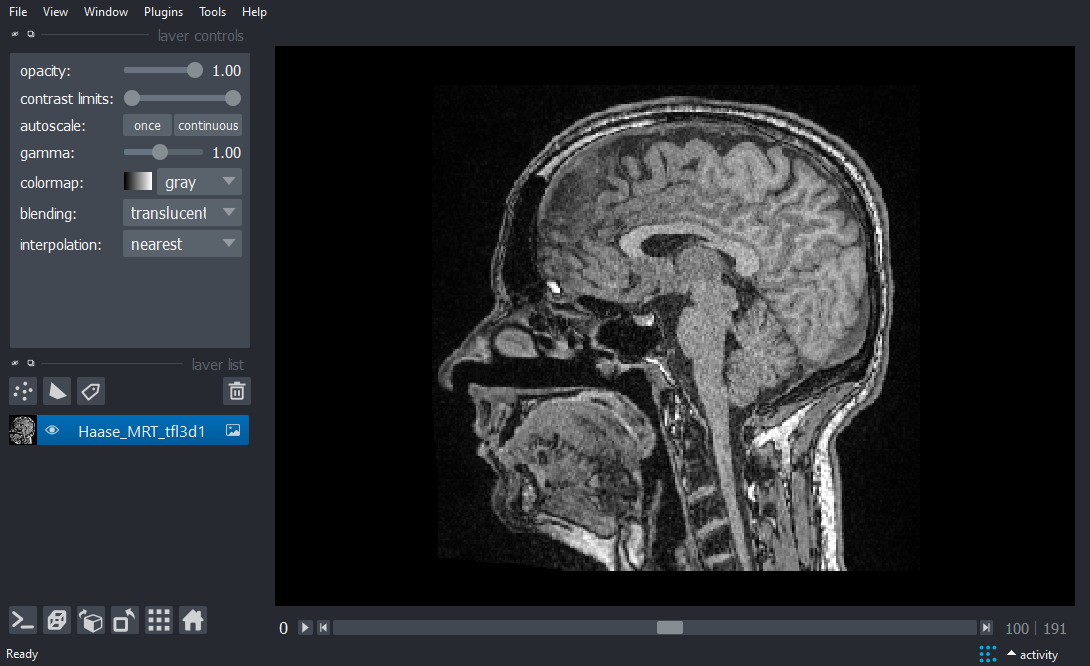

In [2]:
# Start a napari viewer
viewer = napari.Viewer()

# open an image and store it in a layer
image_layer = viewer.open("../../data/Haase_MRT_tfl3d1.tif")

# select a center plane
viewer.dims.current_step = [100, 0, 0]

# Show napari window
nbscreenshot(viewer)

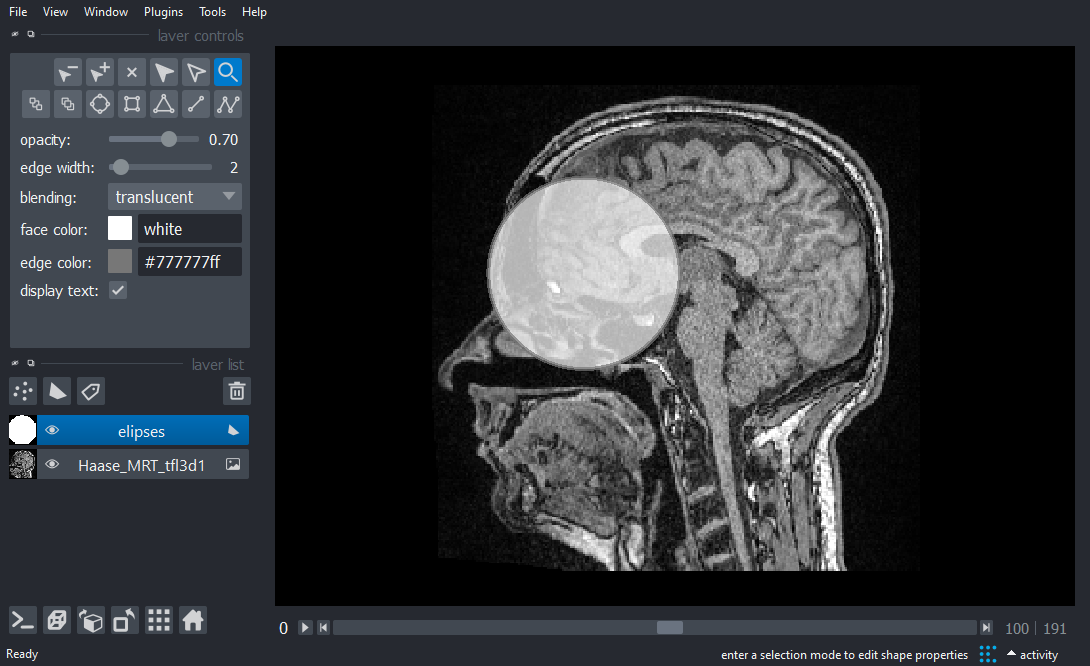

In [3]:
def make_circle(circle_center_x, circle_center_y, circle_radius):
    current_z_slice = viewer.dims.current_step[0]

    return [[current_z_slice, circle_center_y - circle_radius, circle_center_x - circle_radius],
           [current_z_slice, circle_center_y - circle_radius, circle_center_x + circle_radius],
           [current_z_slice, circle_center_y + circle_radius, circle_center_x - circle_radius],
           [current_z_slice, circle_center_y + circle_radius, circle_center_x + circle_radius]]

elipses = make_circle(80, 100, 50)
    
shapes_layer = viewer.add_shapes(elipses, shape_type='ellipse', edge_width=2)

nbscreenshot(viewer)

Next, we attach a graphical user-interface (GUI) for cropping a region.

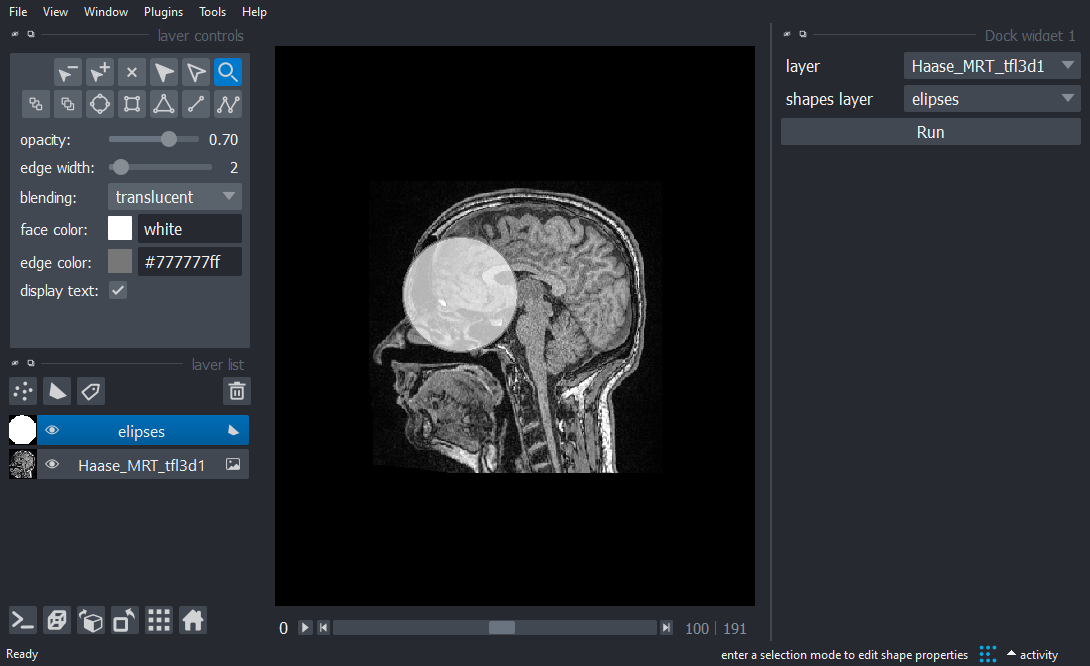

In [4]:
# make a graphical user interface
crop_gui = magicgui(crop_region)

# attach it to the viewer window
viewer.window.add_dock_widget(crop_gui)

nbscreenshot(viewer)

After attaching the GUI, we can also click the `Run button` and crop out a region like this:

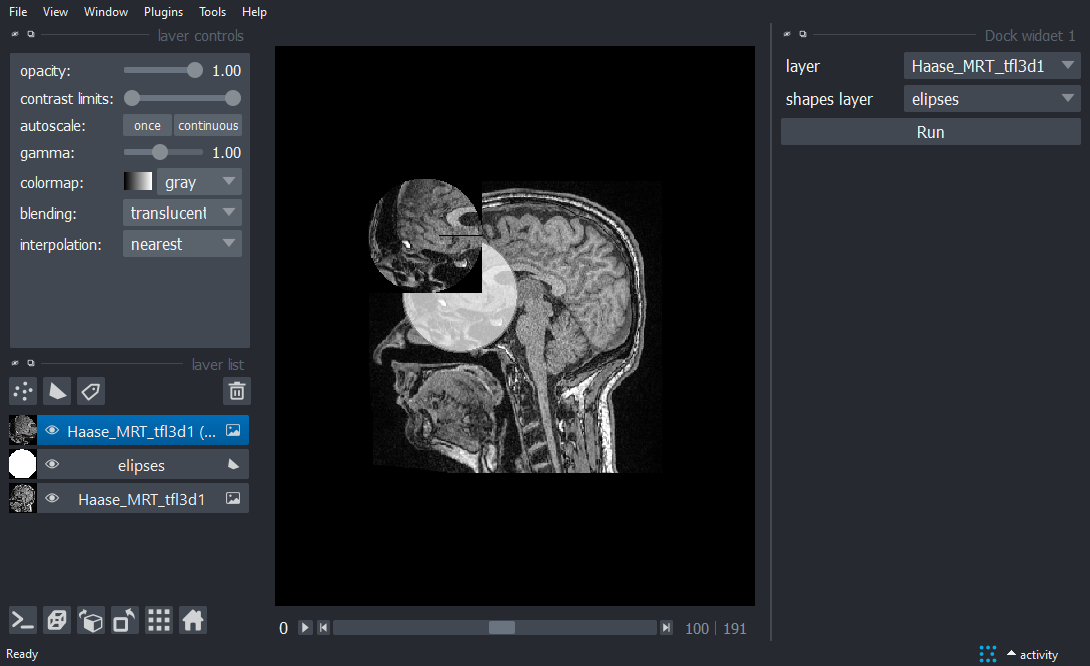

In [5]:
crop_gui()

nbscreenshot(viewer)

We can also reposition the circle and crop again.

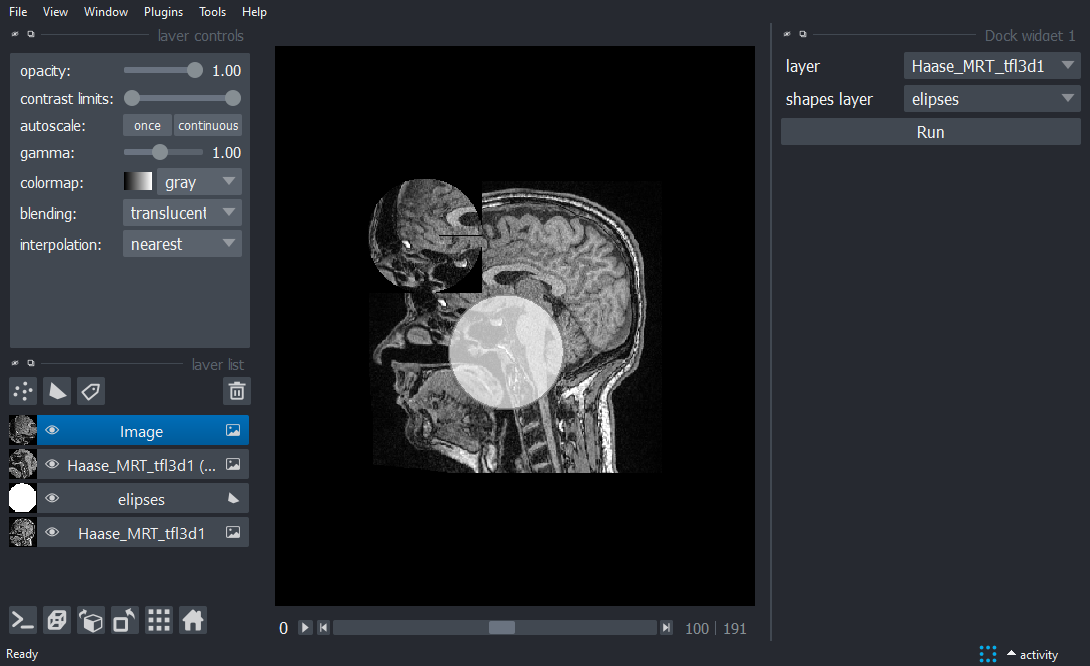

In [6]:
# reposition the selected circle
elipses = make_circle(120, 150, 50)
shapes_layer.data = elipses

# duplicate last cropped layer, because cropping again would overwrite it
viewer.add_image(viewer.layers[-1].data)

# crop again
crop_gui()

nbscreenshot(viewer)

By the end, we remove the image and shapes layer and take a look at the crops side by side.

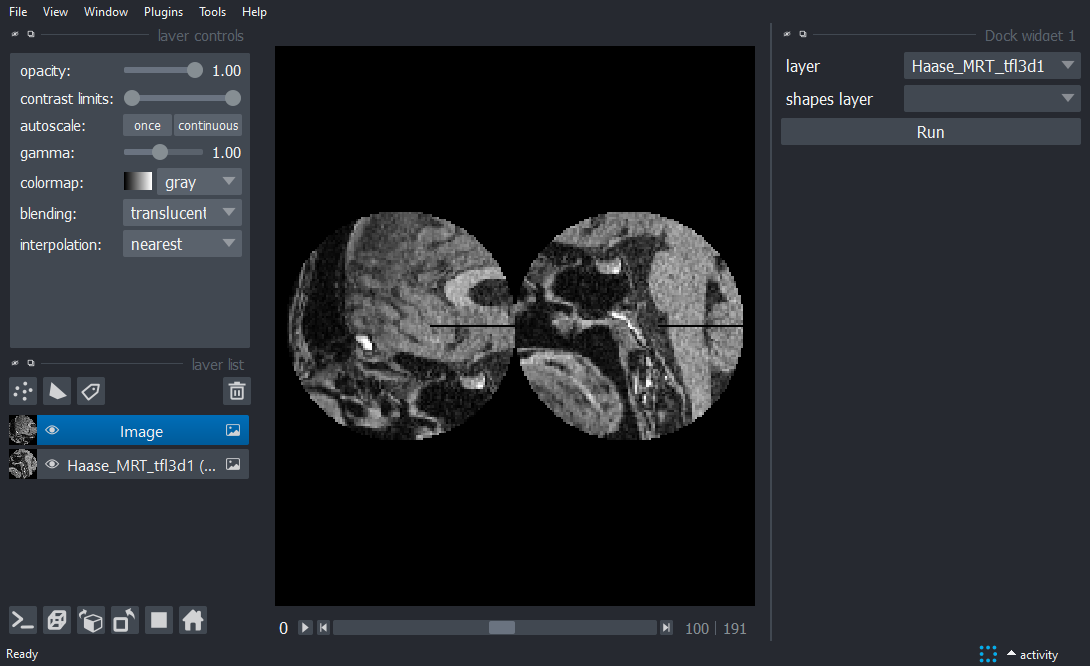

In [7]:
# Remove the first two layers
viewer.layers.remove(viewer.layers[0])
viewer.layers.remove(viewer.layers[0])

# toggle grid view
viewer.grid.enabled = True
viewer.grid.stride = 1

nbscreenshot(viewer)